<a href="https://colab.research.google.com/github/mfWesterhouse/Class119/blob/main/class119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving class119.csv to class119.csv


In [2]:
import pandas as pd

names = ['Pregnacies', 'Glucose', 'BP', 'ST', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Outcome']

df = pd.read_csv('class119.csv', names=names).iloc[1:]

print(df.head())

  Pregnacies Glucose  BP  ST Insulin   BMI Pedigree Age Outcome
1          6     148  72  35       0  33.6    0.627  50       1
2          1      85  66  29       0  26.6    0.351  31       0
3          8     183  64   0       0  23.3    0.672  32       1
4          1      89  66  23      94  28.1    0.167  21       0
5          0     137  40  35     168  43.1    2.288  33       1


In [6]:
features = ['Pregnacies', 'Glucose', 'BP', 'Insulin', 'BMI', 'Age', 'Pedigree']
X = df[features]
y = df['Outcome']

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

clf = DecisionTreeClassifier()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.6926406926406926


In [11]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image
import pydotplus

dot_data = StringIO() #Where we will store the data from our decision tree classifier as text.

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Glucose &le; 129.5<br/>gini = 0.449<br/>samples = 537<br/>value = [354, 183]<br/>class = 0>, fillcolor="#f2c29f"] ;
1 [label=<BMI &le; 26.3<br/>gini = 0.329<br/>samples = 357<br/>value = [283, 74]<br/>class = 0>, fillcolor="#eca26d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<BMI &le; 9.1<br/>gini = 0.06<br/>samples = 97<br/>value = [94, 3]<br/>class = 0>, fillcolor="#e6853f"] ;
1 -> 2 ;
3 [label=<Age &le; 28.0<br/>gini = 0.444<br/>samples = 6<br/>value = [4, 2]<br/>class = 0>, fillcolor="#f2c09c"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [4, 0]<br/>class = 0>, fillcolor="#e58139"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 2<br/>value = [0, 2]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 5 ;
6 [label=<Pedigree &le; 0.669<br/>gini = 0.022<br/>samples = 91<br/>value = [90, 1]<br/>class = 0>, fillcolor=

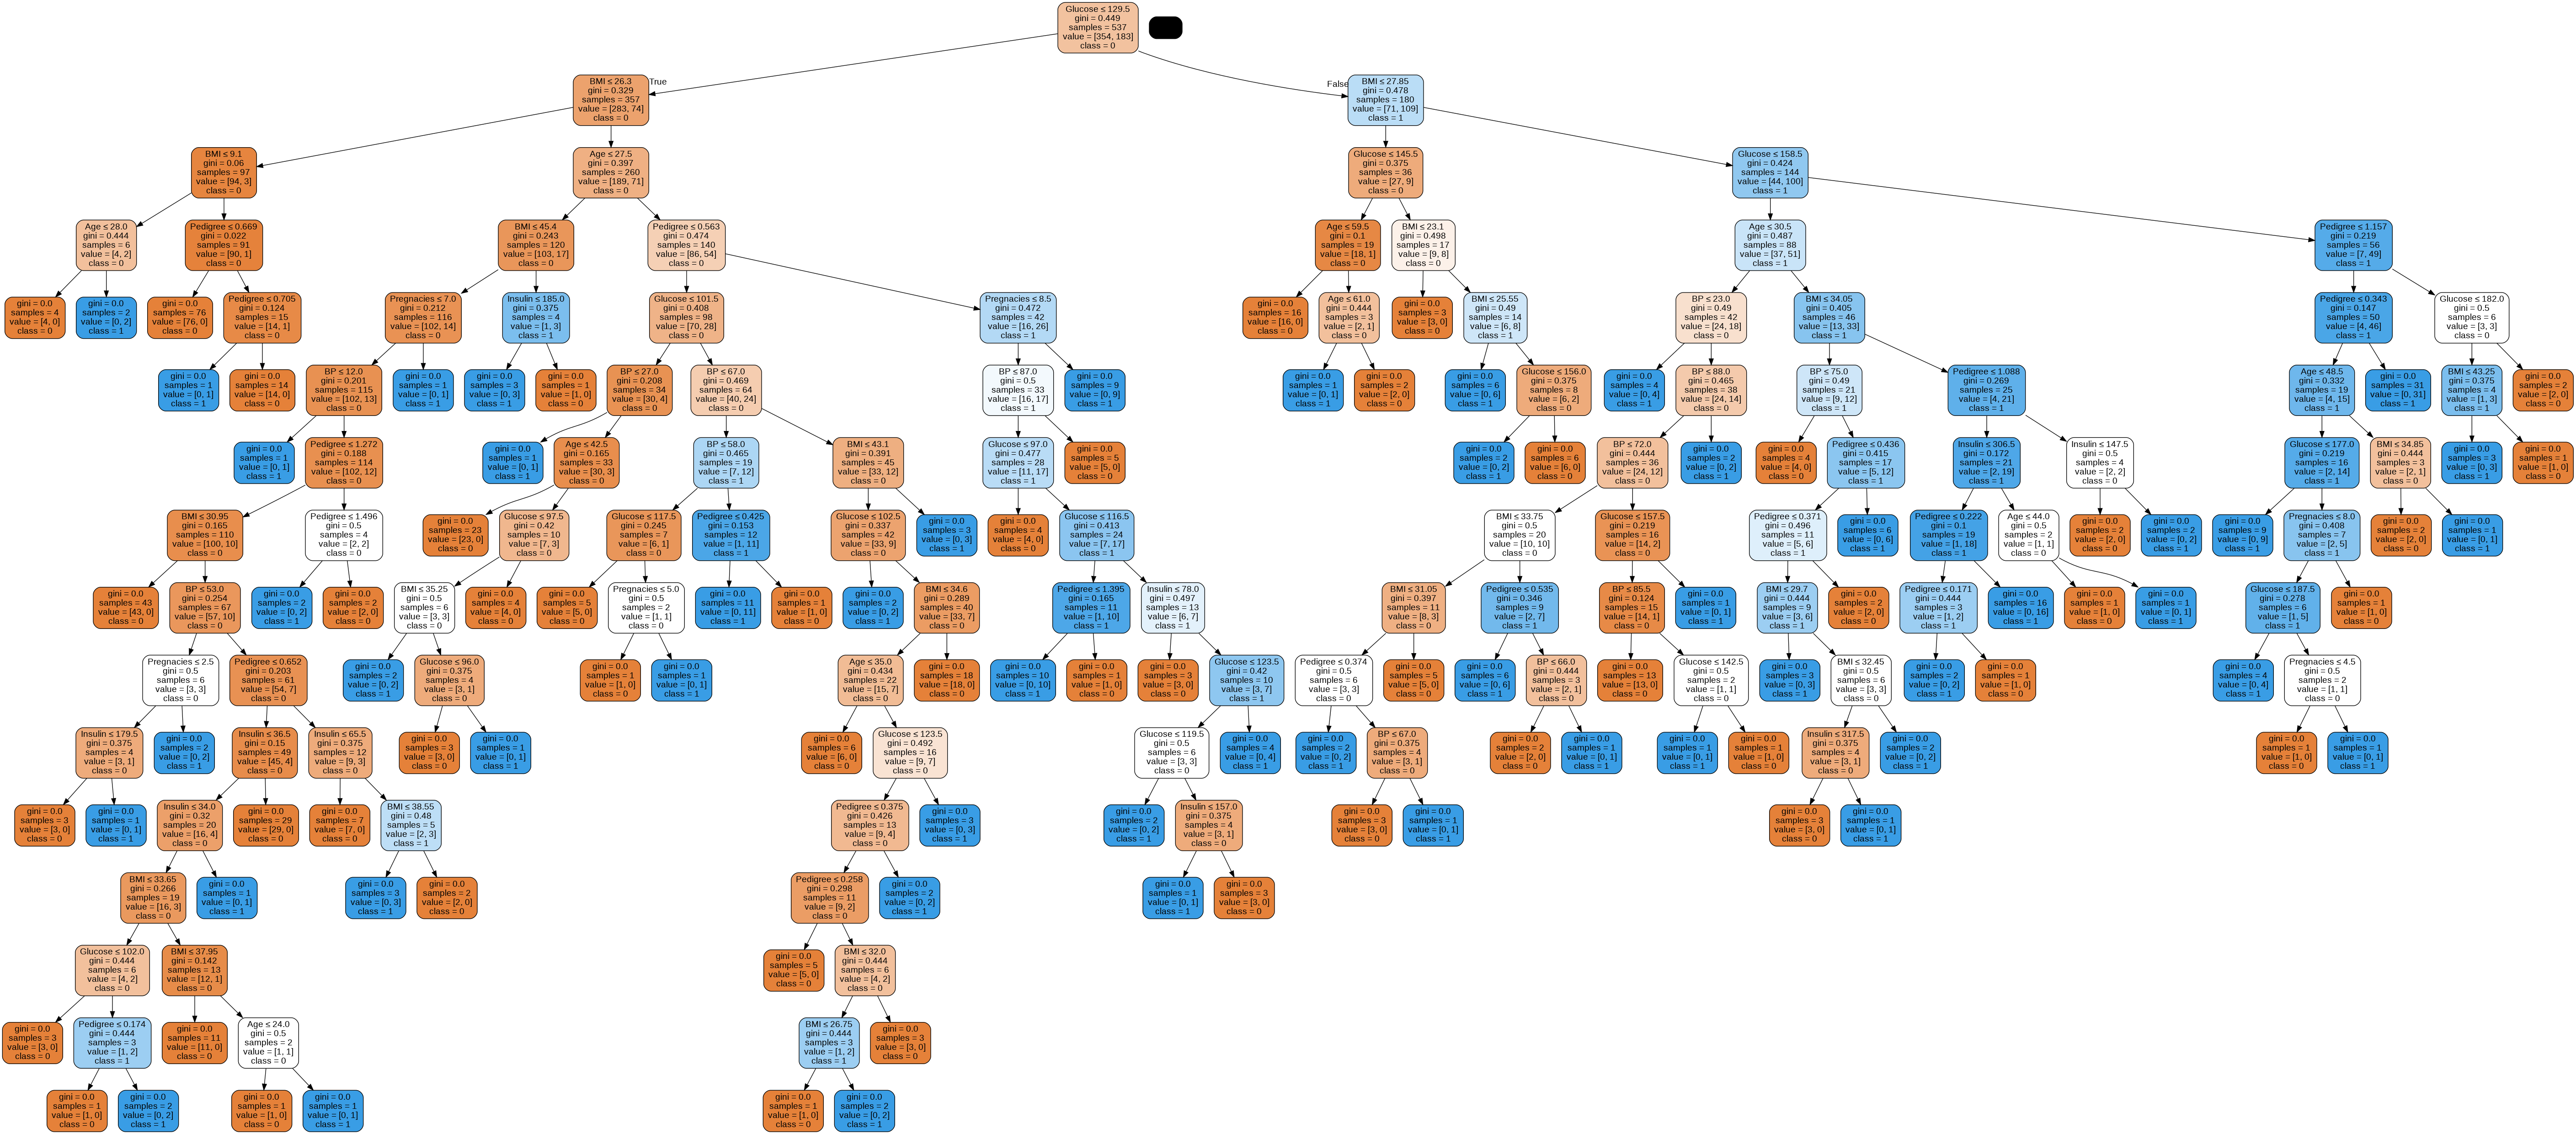

In [12]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Diabetes.png')
Image(graph.create_png())

In [13]:
clf = DecisionTreeClassifier(max_depth=3)

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.7575757575757576


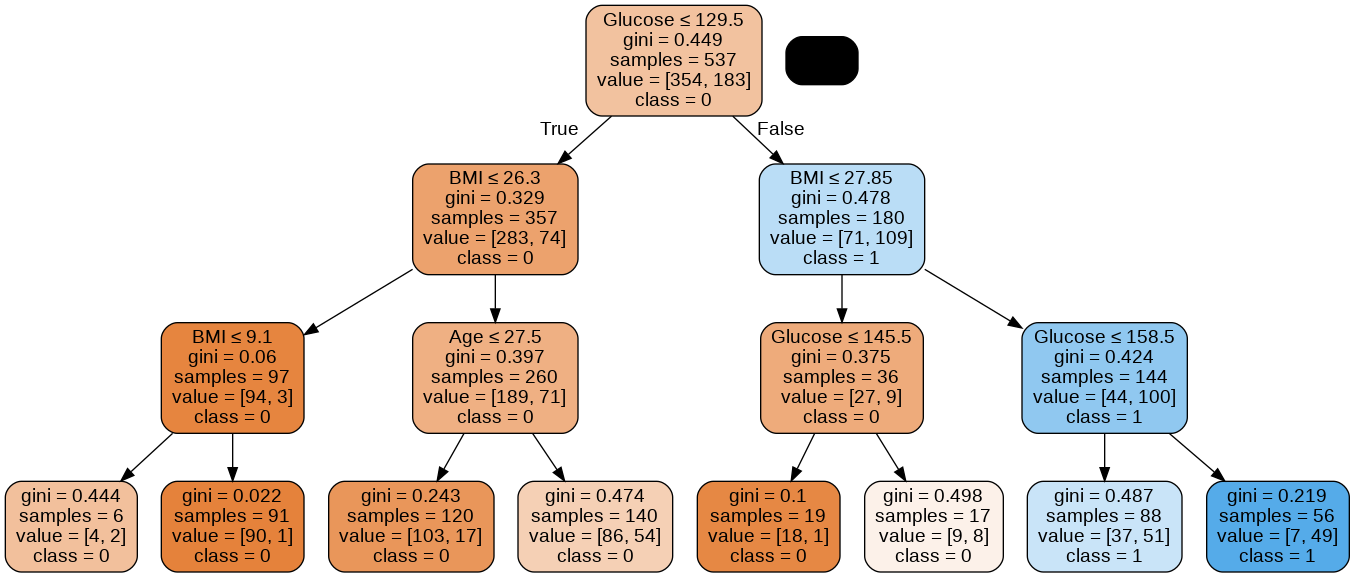

In [18]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('Diabetes.png')
Image(graph.create_png())